In [1]:
# Gradient Descent for Linear Regression
# yhat = wx + b 
# mse = (y-yhat)**2 / 2m 
import numpy as np

np.set_printoptions(suppress = True,
   formatter = {'float_kind':'{:f}'.format})

## Gradient Descent With Multiple Variables
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (\hat{y}^{(i)} - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set

    
* $\hat{y}^{(i)} = f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [2]:
# Create gradient descent function
def gradient_descend(X, y, w, b, learning_rate): 
    m = X.shape[0]
    y_pred = np.dot(X, w) + b
    #print ("y_pred", y_pred)

    """sumDw = 0
    sumDb = 0
    for i in range(m):
        sumDw += (y_pred[i]-y[i])*X[i]
        sumDb += (y_pred[i]-y[i])"""
    
    dw = (1/m) * np.dot(X.T, (y_pred-y))
    #print ("dw", dw)
    db = (1/m) * np.sum(y_pred-y)
    #print ("db", db)

    # Make an update to the w parameter 
    w = w - (learning_rate * dw)
    b = b - (learning_rate * db)
    return w, b

In [3]:
def fit(X, y, learning_rate = 0.001):
    n_features = X.shape[1]
    # Parameters
    w = np.zeros(n_features)
    b = 0
    
    # Iteratively make updates
    for epoch in range(1000): 
        w, b = gradient_descend(X, y, w, b, learning_rate)
        # Debugging - Calculate the mse and print it every 100 epochs
        if epoch % 100 == 0:
            y_pred = np.dot(X, w) + b
            mse = np.mean((y_pred-y)**2)
            print(f'{epoch} mse is {mse}, paramters w:{w}, b:{b}')
    
    return w, b

In [4]:
def predict(X, w, b):
    y_pred = np.dot(X, w) + b
    return y_pred

In [5]:
# Testing the model
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y = np.array([6, 10, 12, 23])

print(X.shape, y.shape)
w, b = fit(X, y)
print("w", w)
print("b", b)

X_test = np.array([[5, 6], [6, 7]])
y_pred = predict(X_test, w, b)
print("X_test:", X_test)
print("y_pred:", y_pred)

(4, 2) (4,)
0 mse is 193.80047896875004, paramters w:[0.038500 0.051250], b:0.012750000000000001
100 mse is 8.782391827792338, paramters w:[1.593807 2.087506], b:0.4936992330167193
200 mse is 6.477689422407822, paramters w:[1.793954 2.300350], b:0.5063963785479015
300 mse is 6.387237602795848, paramters w:[1.844496 2.312753], b:0.4682566006192434
400 mse is 6.325705968743046, paramters w:[1.878092 2.303289], b:0.4251966871458539
500 mse is 6.266565919823646, paramters w:[1.909346 2.291604], b:0.3822574194988948
600 mse is 6.209427323797611, paramters w:[1.939873 2.279855], b:0.3399821611726684
700 mse is 6.154218829402291, paramters w:[1.969858 2.268278], b:0.2984196139735879
800 mse is 6.10087519536888, paramters w:[1.999330 2.256894], b:0.2575642405869131
900 mse is 6.049333428973551, paramters w:[2.028300 2.245705], b:0.21740472133867594
w [2.056494 2.234815]
b 0.1783206893367041
X_test: [[5 6]
 [6 7]]
y_pred: [23.869678 28.160986]


X_train - 5 values [[0.343618]
 [-1.012831]
 [-0.600639]
 [1.523030]
 [0.767435]]
y_train - 5 values [35.220218 -32.721603 3.032786 60.251724 60.112745]


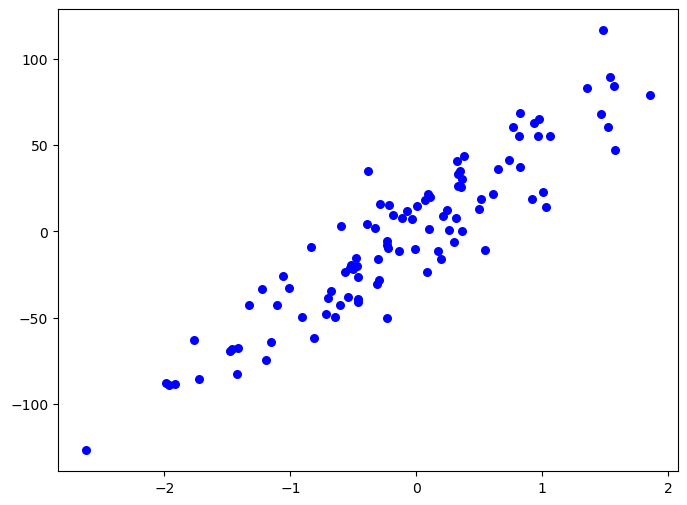

0 mse is 2081.72145852622, paramters w:[0.389779], b:-0.05815798769184628
100 mse is 626.3196076838918, paramters w:[26.519267], b:-2.300996485768882
200 mse is 357.8754728824118, paramters w:[37.796973], b:-1.7738058455457006
300 mse is 305.2674517107224, paramters w:[42.742086], b:-0.9941253314263869
400 mse is 294.53707661014585, paramters w:[44.938901], b:-0.4496959636836067
500 mse is 292.294616929442, paramters w:[45.925087], b:-0.1346994947807962
600 mse is 291.81936953441783, paramters w:[46.371464], b:0.03277558693245645
700 mse is 291.71785646752767, paramters w:[46.574798], b:0.11777399673417772
800 mse is 291.6960793920838, paramters w:[46.667874], b:0.15970894722041004
900 mse is 291.69139665493765, paramters w:[46.710636], b:0.18002237229227824
y_pred [-61.876731 69.251968 38.159174 -18.133619 -10.752359 -13.441233
 -21.573971 -82.197552 38.597349 43.708587 48.368495 16.877620 -56.860598
 -24.566127 -53.596490 -22.202235 45.777100 11.496623 34.698371 17.746121]
MSE:  417.

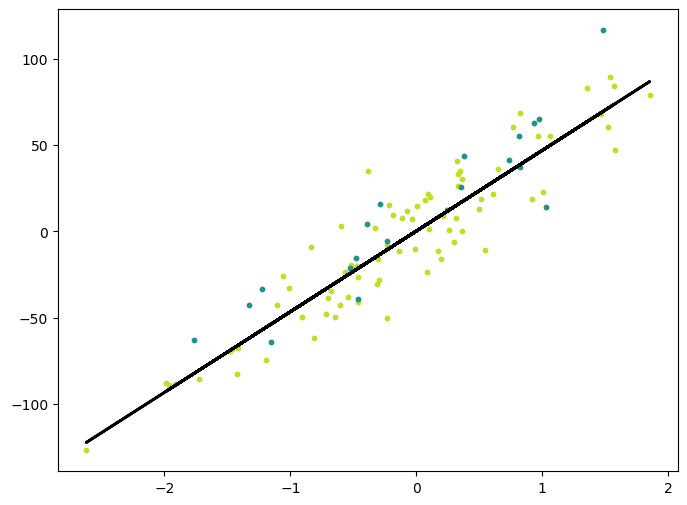

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print 5 samples
print("X_train - 5 values", X_train[:5])
print("y_train - 5 values", y_train[:5])


fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

w, b = fit(X_train, y_train, learning_rate=0.01)
y_pred = predict(X_test, w, b)

print("y_pred", y_pred)


def mse(y_test, y_pred):
    return np.mean((y_test - y_pred)**2)

mse = mse(y_test, y_pred)
print("MSE: ", mse)
print("Weights: ", w)
print("Bias: ", b)

y_pred_line = predict(X, w, b)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()